In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import ParameterGrid

In [2]:
df = pd.read_csv("daily_revenue.csv", parse_dates=["date"])
df.set_index("date", inplace=True)

In [3]:
df

,revenue,discount_rate,coupon_rate
date,,,
1/1/2018,"6,270,839",34.27%,1.09%
2/1/2018,"8,922,076",30.87%,1.08%
3/1/2018,"8,446,101",28.11%,1.01%
4/1/2018,"7,785,798",27.32%,0.96%
5/1/2018,"6,375,303",25.70%,0.90%
...,...,...,...
26/11/2022,"26,934,947",30.41%,0.38%
27/11/2022,"31,890,868",29.75%,0.35%
28/11/2022,"32,100,918",25.27%,8.93%


In [ ]:

if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index, format='%d/%m/%Y') 

In [5]:
df

,revenue,discount_rate,coupon_rate
date,,,
2018-01-01,"6,270,839",34.27%,1.09%
2018-01-02,"8,922,076",30.87%,1.08%
2018-01-03,"8,446,101",28.11%,1.01%
2018-01-04,"7,785,798",27.32%,0.96%
2018-01-05,"6,375,303",25.70%,0.90%
...,...,...,...
2022-11-26,"26,934,947",30.41%,0.38%
2022-11-27,"31,890,868",29.75%,0.35%
2022-11-28,"32,100,918",25.27%,8.93%


In [6]:
df['revenue'] = df['revenue'].str.replace(',', '').astype(float)
df.head()

,revenue,discount_rate,coupon_rate
date,,,
2018-01-01,6270839.0,34.27%,1.09%
2018-01-02,8922076.0,30.87%,1.08%
2018-01-03,8446101.0,28.11%,1.01%
2018-01-04,7785798.0,27.32%,0.96%
2018-01-05,6375303.0,25.70%,0.90%


In [7]:


for col in ['discount_rate', 'coupon_rate']:
    df[col] = pd.to_numeric(df[col].str.replace('%', ''), errors='coerce')


In [8]:

monthly_revenue = df.resample('M').mean()
monthly_revenue


<ipython-input-8-6b1bbcc01ed1>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.resample('M').mean()


,revenue,discount_rate,coupon_rate
date,,,
2018-01-31,6.897600e+06,25.490645,1.585161
2018-02-28,6.090103e+06,20.097500,0.965357
2018-03-31,7.329329e+06,13.715806,1.604194
2018-04-30,8.306953e+06,12.454667,0.928333
2018-05-31,7.292739e+06,11.299355,0.790968
2018-06-30,7.570532e+06,16.942333,0.704333
2018-07-31,6.707990e+06,24.634839,1.762581
2018-08-31,6.196929e+06,15.070645,0.734194
2018-09-30,8.058146e+06,10.979667,1.267333


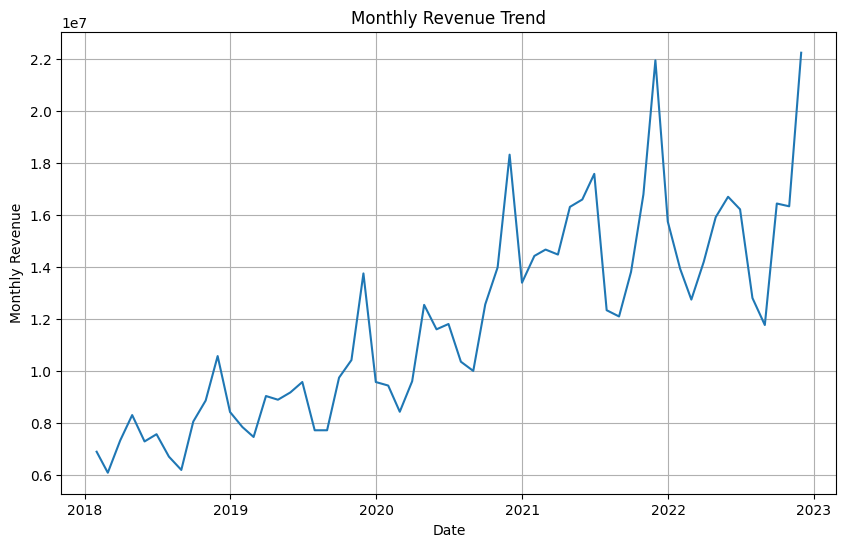

In [9]:



plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue['revenue'])
plt.xlabel("Date")
plt.ylabel("Monthly Revenue")
plt.title("Monthly Revenue Trend")
plt.grid(True)
plt.show()


In [10]:


from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the 'revenue' column
result = adfuller(monthly_revenue['revenue'])

# Print the test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))




ADF Statistic: -0.370274
p-value: 0.914945
Critical Values:
	1%: -3.578
	5%: -2.925
	10%: -2.601


In [11]:


monthly_revenue['revenue_diff'] = monthly_revenue['revenue'].diff()

monthly_revenue = monthly_revenue.dropna()

result = adfuller(monthly_revenue['revenue_diff'])

# Print the test results
print('ADF Statistic (Differenced Series): %f' % result[0])
print('p-value (Differenced Series): %f' % result[1])
print('Critical Values (Differenced Series):')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic (Differenced Series): -2.013656
p-value (Differenced Series): 0.280618
Critical Values (Differenced Series):
	1%: -3.581
	5%: -2.927
	10%: -2.602


In [12]:

monthly_revenue['revenue_diff_2'] = monthly_revenue['revenue_diff'].diff()
monthly_revenue = monthly_revenue.dropna()

result = adfuller(monthly_revenue['revenue_diff_2'])

# Print the test results
print('ADF Statistic (2nd Differenced Series): %f' % result[0])
print('p-value (2nd Differenced Series): %f' % result[1])
print('Critical Values (2nd Differenced Series):')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic (2nd Differenced Series): -4.543337
p-value (2nd Differenced Series): 0.000164
Critical Values (2nd Differenced Series):
	1%: -3.585
	5%: -2.928
	10%: -2.602


<ipython-input-12-c32bbe3a0f8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_revenue['revenue_diff_2'] = monthly_revenue['revenue_diff'].diff()


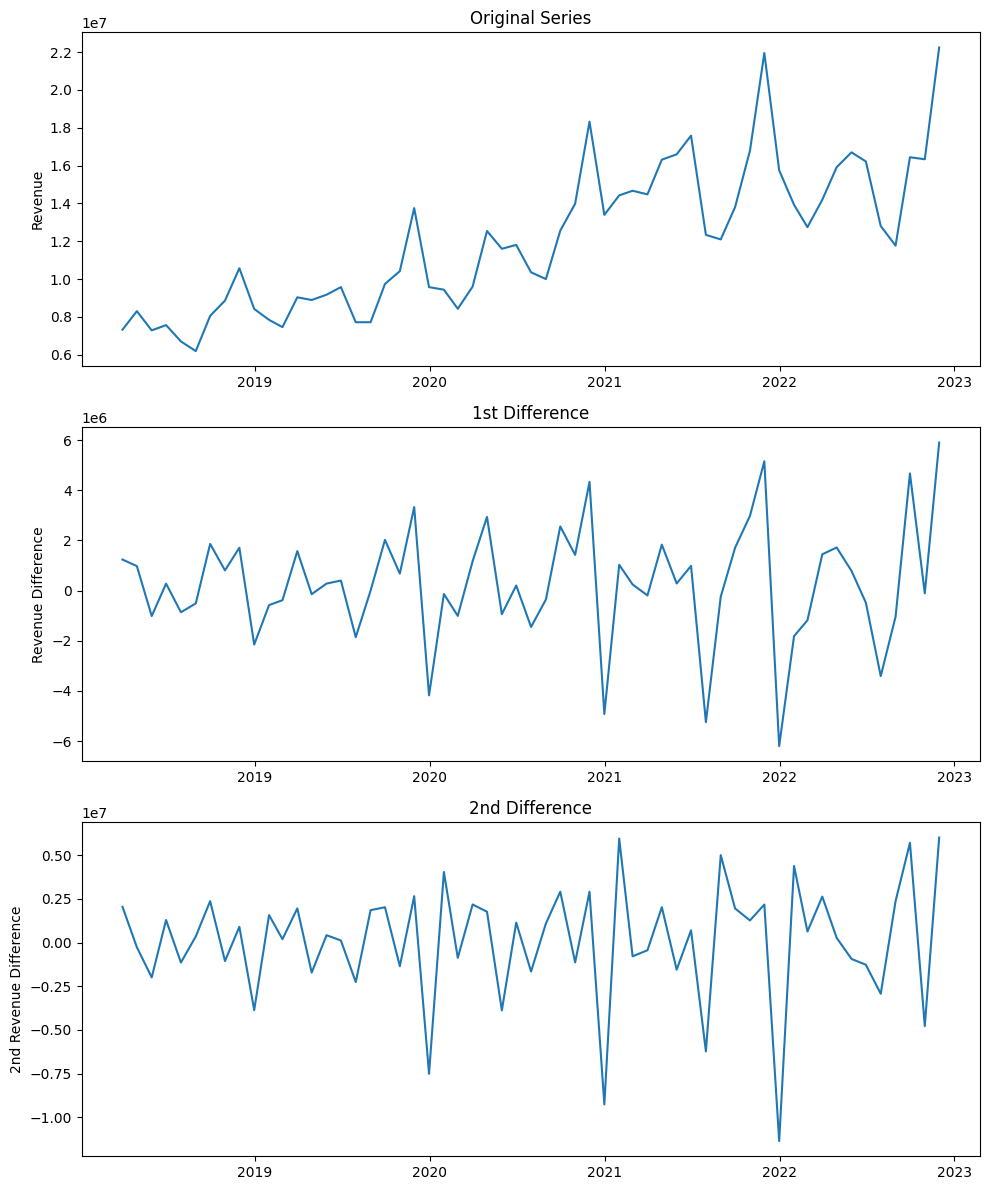

In [13]:

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

axes[0].plot(monthly_revenue['revenue'])
axes[0].set_title('Original Series')
axes[0].set_ylabel('Revenue')

axes[1].plot(monthly_revenue['revenue_diff'])
axes[1].set_title('1st Difference')
axes[1].set_ylabel('Revenue Difference')

axes[2].plot(monthly_revenue['revenue_diff_2'])
axes[2].set_title('2nd Difference')
axes[2].set_ylabel('2nd Revenue Difference')

plt.tight_layout()
plt.show()


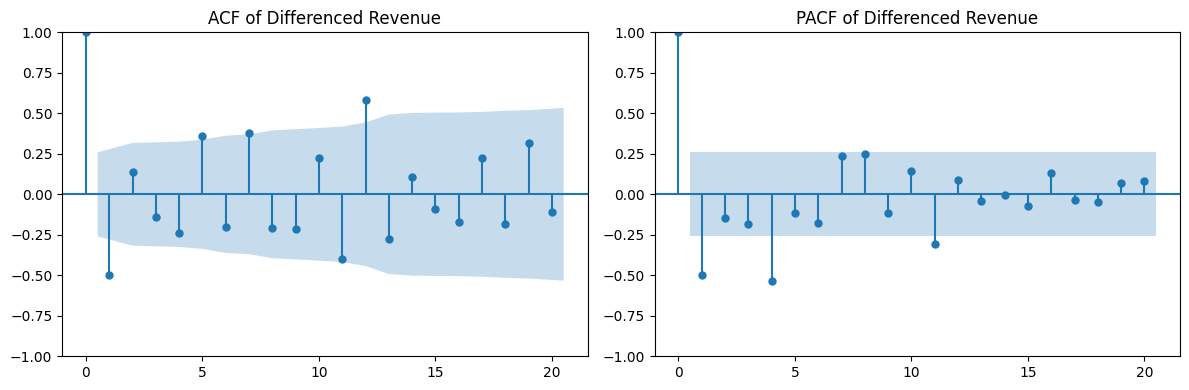

In [14]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

plot_acf(monthly_revenue['revenue_diff_2'], ax=axes[0], lags=20)
axes[0].set_title('ACF of Differenced Revenue')

plot_pacf(monthly_revenue['revenue_diff_2'], ax=axes[1], lags=20)
axes[1].set_title('PACF of Differenced Revenue')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


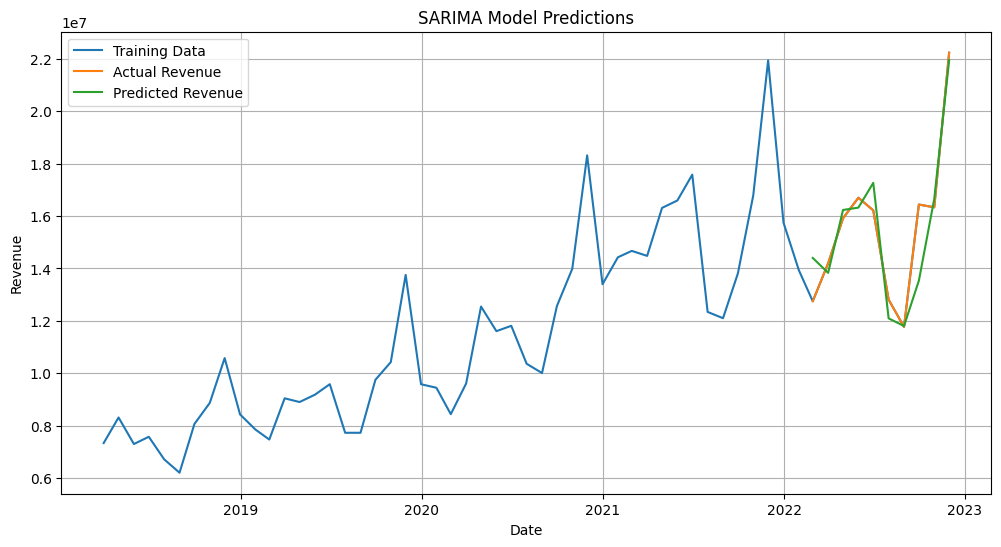

RMSE: 1155713.2066403837
MAE: 802596.2391966628


In [32]:

from statsmodels.tsa.statespace.sarimax import SARIMAX


train_data = monthly_revenue[:-10]
test_data = monthly_revenue[-10:]


model = SARIMAX(train_data['revenue'], order=(1, 1, 0), seasonal_order=(0, 1, 2, 12))
results = model.fit()


predictions = results.get_forecast(steps=len(test_data))
predicted_mean = predictions.predicted_mean

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue['revenue'], label='Training Data')
plt.plot(test_data.index, test_data['revenue'], label='Actual Revenue')
plt.plot(test_data.index, predicted_mean, label='Predicted Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('SARIMA Model Predictions')
plt.legend()
plt.grid(True)
plt.show()
rmse = np.sqrt(mean_squared_error(test_data['revenue'], predicted_mean))
mae = mean_absolute_error(test_data['revenue'], predicted_mean)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


In [33]:


import numpy as np

def calculate_aic_bic(model):
    """Calculates AIC and BIC for a given statsmodels model."""
    aic = model.aic
    bic = model.bic
    return aic, bic

def calculate_mape(actual, predicted):

    mape = mean_absolute_percentage_error(actual, predicted)
    return mape

aic, bic = calculate_aic_bic(results)
mape = calculate_mape(test_data['revenue'], predicted_mean)

print(f"AIC: {aic}")
print(f"BIC: {bic}")
print(f"MAPE: {mape}")


AIC: 1061.3893464064818
BIC: 1067.4947885049464
MAPE: 0.05305804982108888


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


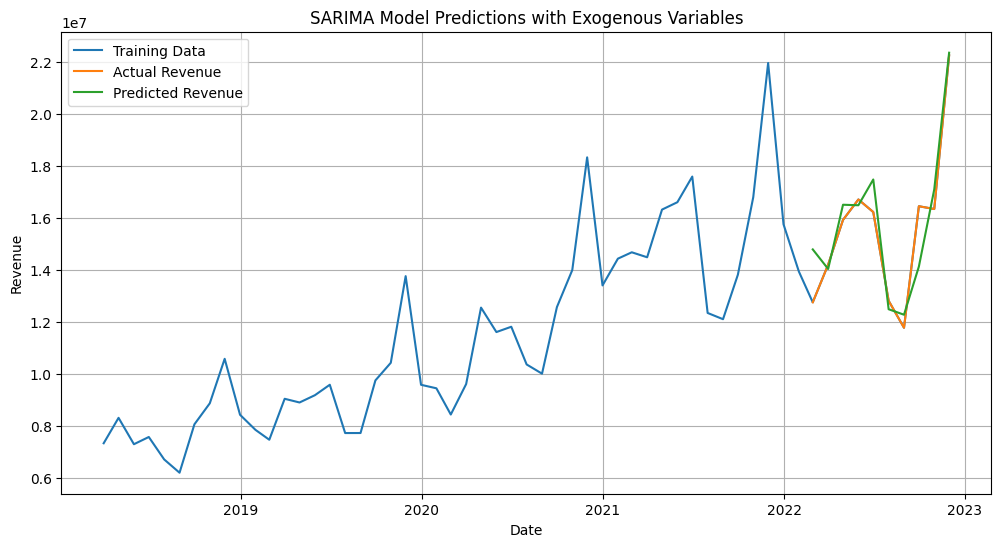

RMSE: 1115135.648751747
MAE: 825894.4038868721


In [35]:
exog_train = train_data[['discount_rate', 'coupon_rate']]
exog_test = test_data[['discount_rate', 'coupon_rate']]

model = SARIMAX(train_data['revenue'], exog=exog_train, order=(1, 1, 0), seasonal_order=(0, 1, 2, 12))
results = model.fit()


predictions = results.get_forecast(steps=len(test_data), exog=exog_test)
predicted_mean = predictions.predicted_mean

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue['revenue'], label='Training Data')
plt.plot(test_data.index, test_data['revenue'], label='Actual Revenue')
plt.plot(test_data.index, predicted_mean, label='Predicted Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('SARIMA Model Predictions with Exogenous Variables')
plt.legend()
plt.grid(True)
plt.show()

rmse = np.sqrt(mean_squared_error(test_data['revenue'], predicted_mean))
mae = mean_absolute_error(test_data['revenue'], predicted_mean)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


In [36]:
def calculate_aic_bic(model):
    """Calculates AIC and BIC for a given statsmodels model."""
    aic = model.aic
    bic = model.bic
    return aic, bic

def calculate_mape(actual, predicted):

    mape = mean_absolute_percentage_error(actual, predicted)
    return mape

aic, bic = calculate_aic_bic(results)
mape = calculate_mape(test_data['revenue'], predicted_mean)

print(f"AIC: {aic}")
print(f"BIC: {bic}")
print(f"MAPE: {mape}")

AIC: 1064.7993584332528
BIC: 1073.9575215809498
MAPE: 0.0558193509744848
